In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def update_joints_pos(m_angles, lengths):
    
    jm = np.array([0, 0])
    for i in range(len(m_angles)):
        temp = np.array([lengths[i] * np.sin(m_angles[i]), lengths[i] * np.cos(m_angles[i])])
        jm = np.append(jm, temp)
        
    print(jm)

[[0. 0.]
 [0. 1.]
 [1. 1.]] [0 1] [0.5 0. ]
[[ 0.          0.        ]
 [-0.31622777  0.68377223]
 [ 0.9486833   0.9486833 ]] [1. 1.] [0.5 1. ]
[[ 0.          0.        ]
 [-0.31622777  0.67048902]
 [ 0.9486833   1.11113325]] [1.26491106 0.26491106] [0.81622777 0.31622777]
[[ 0.          0.        ]
 [-0.53524502  0.45147176]
 [ 0.84469685  1.0071468 ]] [0.9486833  1.11113325] [0.5 1. ]
[[ 0.          0.        ]
 [-0.53524502  0.42916254]
 [ 0.84469685  1.10911707]] [1.37994187 0.55567504] [1.03524502 0.54852824]
[[ 0.          0.        ]
 [-0.68312284  0.28128472]
 [ 0.73030349  0.99472371]] [0.84469685 1.10911707] [0.5 1. ]
[[ 0.          0.        ]
 [-0.68312284  0.25759637]
 [ 0.73030349  1.06948982]] [1.41342633 0.71343899] [1.18312284 0.71871528]
[[ 0.          0.        ]
 [-0.77550024  0.16521897]
 [ 0.63134727  0.97053361]] [0.73030349 1.06948982] [0.5 1. ]
[[ 0.          0.        ]
 [-0.77550024  0.14333856]
 [ 0.63134727  1.02598034]] [1.40684751 0.80531464] [1.27550024 

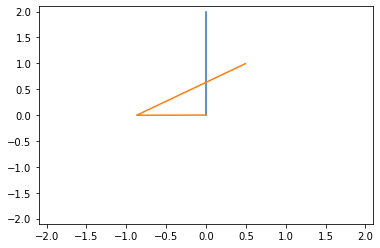

In [13]:
def vector_angles(vector_1, vector_2):
    unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
    unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    return angle

lengths = np.array([1, 1])
X, Y, Z = 1, 1, 1

jm_start = jm = np.array([[0, 0],         # joint 0 (base)
                          [0, 1],         # joint 1
                          [0, 2]])        # joint 2 (end effector)

m_angles = [0, 0]


target_end = np.array([0.5,1])            # where the end of the arm should be

index = len(jm[1,:])-1
while np.linalg.norm(jm[2,:] - target_end) > 0.01:
    current_vector = jm[2,:] - jm[index,:]
    target_vector = target_end - jm[index,:]

    angle = vector_angles(current_vector, target_vector)
    crossResult = np.cross(target_vector, current_vector)
    if crossResult > 0:
        m_angles[index] += angle
    else:
        m_angles[index] -= angle

    # update postions
    jm = np.cumsum(np.array([np.array([0,0]),
                             lengths*np.sin(m_angles),
                             lengths*np.cos(m_angles)]), axis=1)


    # update index
    if index == 0: index = len(jm[1,:])-1
    else: index -= 1

    print(jm, current_vector, target_vector)





plt.plot(jm_start[:, 0], jm_start[:, 1])
plt.plot(jm[:, 0], jm[:, 1])
plt.xlim([-2.1, 2.1])
plt.ylim([-2.1, 2.1])
plt.show()


In [22]:
update_joints_pos(m_angles, [1, 1])

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given